In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [50]:
df.drop(['FastingBS','ExerciseAngina'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            918 non-null    int64  
 1   Sex            918 non-null    object 
 2   ChestPainType  918 non-null    object 
 3   RestingBP      918 non-null    int64  
 4   Cholesterol    918 non-null    int64  
 5   RestingECG     918 non-null    object 
 6   MaxHR          918 non-null    int64  
 7   Oldpeak        918 non-null    float64
 8   ST_Slope       918 non-null    object 
 9   HeartDisease   918 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 71.8+ KB


In [52]:
df.isnull().sum()

Age              0
Sex              0
ChestPainType    0
RestingBP        0
Cholesterol      0
RestingECG       0
MaxHR            0
Oldpeak          0
ST_Slope         0
HeartDisease     0
dtype: int64

In [53]:
df.shape

(918, 10)

In [54]:
df.dtypes

Age                int64
Sex               object
ChestPainType     object
RestingBP          int64
Cholesterol        int64
RestingECG        object
MaxHR              int64
Oldpeak          float64
ST_Slope          object
HeartDisease       int64
dtype: object

In [55]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['ChestPainType']=label.fit_transform(df['ChestPainType'])
df['RestingECG']=label.fit_transform(df['RestingECG'])
df['ST_Slope']=label.fit_transform(df['ST_Slope'])


In [56]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,1,172,0.0,2,0
1,49,0,2,160,180,1,156,1.0,1,1
2,37,1,1,130,283,2,98,0.0,2,0
3,48,0,0,138,214,1,108,1.5,1,1
4,54,1,2,150,195,1,122,0.0,2,0


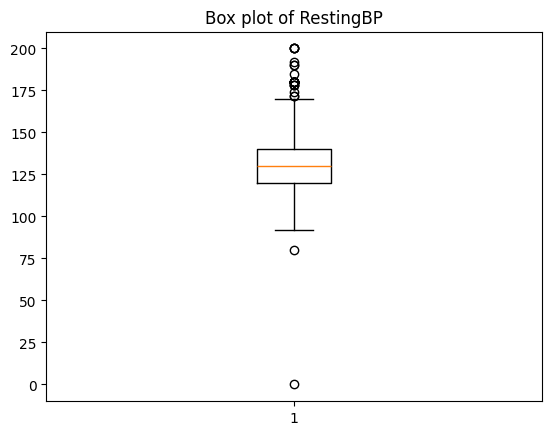

In [57]:
plt.boxplot(df['RestingBP'])
plt.title('Box plot of RestingBP')
plt.show()

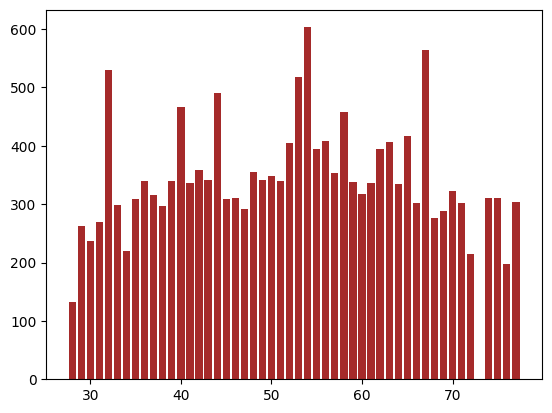

In [58]:
x=df['Age']
y=df['Cholesterol']

plt.bar(x,y,color='brown')
plt.show()

In [59]:
y=df['HeartDisease']
x=df.drop('HeartDisease',axis=1)

In [60]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,ST_Slope
0,40,1,1,140,289,1,172,0.0,2
1,49,0,2,160,180,1,156,1.0,1
2,37,1,1,130,283,2,98,0.0,2
3,48,0,0,138,214,1,108,1.5,1
4,54,1,2,150,195,1,122,0.0,2
...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1
914,68,1,0,144,193,1,141,3.4,1
915,57,1,0,130,131,1,115,1.2,1
916,57,0,1,130,236,0,174,0.0,1


In [61]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.predict([[40,1,1,140,289,1,172,0.0,2]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [72]:
lr.score(x_test,y_test)
lr.score(x_train,y_train)

0.8551401869158879

In [73]:
import pickle
file=open('heart.pkl','wb')
pickle.dump(lr,file)

In [74]:
models=open('heart.pkl','rb')
lrs=pickle.load(models)

In [76]:
lrs.predict([[48,0,0,138,214,1,108,1.5,1]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [19]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
r.predict([[37,1,1,130,283,2,98,0,0.0,2]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
r.score(x_test,y_test)
r.score(x_train,y_train)

1.0

In [21]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
d.predict([[37,1,1,130,283,2,98,0,0.0,2]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
d.score(x_test,y_test)
d.score(x_train,y_train)

1.0

In [77]:
from sklearn.svm import SVC
s=SVC()
s.fit(x_train,y_train)
s.predict([[48,0,0,138,214,1,108,1.5,1]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [78]:
s.score(x_test,y_test)
s.score(x_train,y_train)

0.7383177570093458

In [27]:
import joblib
joblib.dump(lr,'joblib_model')

['joblib_model']

In [29]:
new_model=joblib.load('joblib_model')
new_model.predict([[40,1,1,140,289,1,172,0,0,2]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])